     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Number of positive sentiment tweets: 566
Number of negative sentiment tweets: 85
Number of neutral sentiment tweets: 217


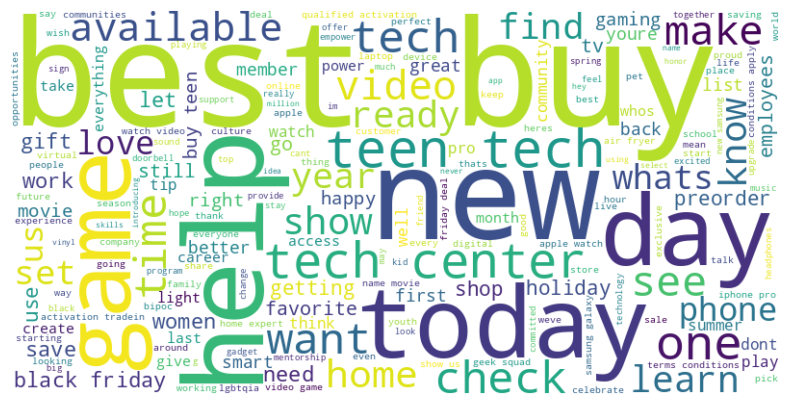

In [ ]:
!pip install vaderSentiment

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv('/content/BestBuy_NodeXL_tweets_data_cleaned.csv')

# Ensure the Text column is of type string and handle NaN values
df['Text'] = df['Text'].fillna('').astype(str)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define the function to get sentiment polarity
def get_sentiment(text):
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict['compound']

# Apply the get_sentiment function to the Text column and create a new Sentiment column
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Convert the Sentiment column to numeric, coercing errors to NaN
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')

# Drop rows with NaN values in the Sentiment column
df = df.dropna(subset=['Sentiment'])

# Count the number of positive, negative, and neutral sentiment tweets
num_positive_sentiments = len(df[df['Sentiment'] > 0])
num_negative_sentiments = len(df[df['Sentiment'] < 0])
num_neutral_sentiments = len(df[df['Sentiment'] == 0])

print("Number of positive sentiment tweets:", num_positive_sentiments)
print("Number of negative sentiment tweets:", num_negative_sentiments)
print("Number of neutral sentiment tweets:", num_neutral_sentiments)

# Concatenate all the text data into a single string
all_text = ' '.join(df['Text'])

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = ' '.join([word for word in all_text.split() if word.lower() not in stop_words])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=0.9).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
